<a href="https://colab.research.google.com/github/ShivSubedi/TraditionalML_PredictiveAnalytics_basics/blob/main/Linear_Regression/Multiple_Linear_Regression/Inc_CategoricalVariable/Multiple_Linear_Regression_IncCategoricalVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bulding a Multiple Regression Model (Population Model) with categorical variable
We build a multiple regression model upon the 'simple regression model'.
The data contains 'SAT' and 'GPA' parameters (like in the simple linear regression model), and now to explore the multiple regression model case, a new parameter (independent variable) is also included called as the 'Attendance'.

Attendace, however, is a categorical variable (either present/absent i.e Yes/No) and we explore how to include such variable in our model. Attendance is marked as 'Yes' if a student attended more that 75% of the lecture and if not it is marked as 'No'.

The approach is inspired by concepts presented in the 'Complete Data Science Bootcamp 2025' course on Udemy, and it expands on these fundamental principles with a detailed explanation of the modeling process, results, and linearity assumption testing.

## Step 1: Import the needed libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Step 2: Load the Data
Data is saved in the github and will be imported from the github url.

In [ ]:
# Download the file from GitHub
github_Rawpath_to_multipleLinearReg_data = "https://raw.githubusercontent.com/ShivSubedi/TraditionalML_PredictiveAnalytics_basics/refs/heads/main/Linear_Regression/Multiple_Linear_Regression/Inc_CategoricalVariable/Inc_CategoricalVariable.csv"
!wget -O Multiple_linear_regression.csv {github_Rawpath_to_multipleLinearReg_data} #download the csv file

--2025-04-07 18:01:13--  https://raw.githubusercontent.com/ShivSubedi/TraditionalML_PredictiveAnalytics_basics/refs/heads/main/Linear_Regression/Multiple_Linear_Regression/Inc_CategoricalVariable/Inc_CategoricalVariable.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1221 (1.2K) [text/plain]
Saving to: ‘Multiple_linear_regression.csv’

Multiple_linear_reg 100%[===================>]   1.19K  --.-KB/s    in 0s      

2025-04-07 18:01:14 (45.4 MB/s) - ‘Multiple_linear_regression.csv’ saved [1221/1221]



In [ ]:
data_csv_mlr=pd.read_csv('Multiple_linear_regression.csv')

In [ ]:
#Explore the data
# data_csv_mlr
data_csv_mlr.head(3)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No


## Step 3: Map the data
We will need to map the data as: Yes->0 and No->1.
For this we follow the following two steps.
1. Copy the data frame into a new one
2. Change the mapping into the new data frame

In [ ]:
## copy the dataframe to new one
data_csv_mlr_mapped=data_csv_mlr.copy()
data_csv_mlr_mapped.head(3)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No


In [ ]:
#Select the 'Attendance' column and map its contents
data_csv_mlr_mapped['Attendance']=data_csv_mlr_mapped['Attendance'].map({'Yes':1, 'No':0})
data_csv_mlr_mapped.head(3)

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0


## Step 4: Perform Descriptive Statistics

In [ ]:
data_csv_mlr_mapped.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Step 5: Build the Multiple Regression model

### 5(a) Define the dependent and independent variables

In [ ]:
x=data_csv_mlr_mapped[['SAT', 'Attendance']] #formulate the independent variable
y=data_csv_mlr_mapped['GPA'] #formulate the dependent variable

### 5(b) Perform Regression Analysis
Here, we perform following steps:
1. Prepare the independent variable data (X) for linear regression by adding a constant term.

For a multiple regression model is represented in a polynomial (multiple regression equation) form as: y = *b<sub>0</sub>x<sup>0</sup> + b<sub>1</sub>*x<sub>1</sub>+ b<sub>2</sub>*x<sub>2</sub>, where x<sup>0</sup> =1, x<sup>1</sup> = 'SAT' score, and x<sup>2</sup>= 'Attendance'

When performing linear regression in Python using libraries like statsmodels or scikit-learn, calculations are often done using matrix operations. To accommodate the constant (intercept) term b<sub>0</sub> in matrix form, we need to represent it as a separate column of 1s. This column of 1s effectively multiplies the intercept b<sub>0</sub> in the matrix calculation, ensuring that b<sub>0</sub> is included in the model.

In [ ]:
x1=sm.add_constant(x) #add a column of constant '1', which would be the x value for the constant term, i.e. x^0=1

2. Fit a linear regression model using the **OLS (Ordinary Least Square)**method, with dependent variable 'y' and new independent variable 'x1'

OLS aims to minimize the sum of the squared differences between the observed values and the values predicted by the model. In simpler terms, OLS finds the line that minimizes the total error of the predictions (i.e. least SSE).

In [ ]:
result_OLS=sm.OLS(y,x1).fit()
coeff=result_OLS.params
b0=coeff.iloc[0]
b1=coeff.iloc[1]
b2=coeff.iloc[2]
print('Coeff of const term (bo)', b0)
print('Coeff of SAT score (b1)', b1)
print('Coeff of Attendance (b2)', b2)

Coeff of const term (bo) 0.6438504592803083
Coeff of SAT score (b1) 0.0013998015651245348
Coeff of Attendance (b2) 0.2226440877296421


In [ ]:
#print the summary of the regression
result_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.19e-15
Time:                        18:01:49   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5(c) Formulate the regression lines for two cases of dummy variable
 The regression equation we used above is: y = *b<sub>0</sub>x<sup>0</sup> + b<sub>1</sub>*x<sub>1</sub>+ b<sub>2</sub>*x<sub>2</sub>, where x<sup>0</sup> =1, , x<sub>1</sub> = 'SAT' score, and x<sub>2</sub>= 'Attendance'. Lets look into how this equation turns to be with the 'Attendance' variable inclusion.

When Attendance=1 => x<sub>2</sub>=1, thus the above equation turns to be:
y = *b<sub>0</sub>x<sup>0</sup> + b<sub>1</sub>*x<sub>1</sub>+ b<sub>2</sub> =*(b<sub>0</sub> +b<sub>2</sub>) + b<sub>1</sub>*x<sub>1</sub>

When Attendance=0 => x<sub>2</sub>=0, thus the above equation turns to be:
y = *b<sub>0</sub>x<sup>0</sup> + b<sub>1</sub>*x<sub>1</sub>

We will overlay the above two equations for two Attendance cases in the scatter plot of 'SAT' score vs 'GPA'

In [ ]:
#Lets formulate the two regression lines corresponding to Attendance as Yes and No
yhat_AttendYes= (b0+b2)+b1*data_csv_mlr_mapped['SAT']
yhat_AttendNo=b0+b1*data_csv_mlr_mapped['SAT']

### 5(d) Plot the two regression line(s) on the scatter plot
Here we will have a scatter plot of 'GPA' and 'SAT' score and then overlay two regression lines to show the impact of 'Attendance'.

**What do we observe from the plot?** we observed that the slope of the regression lines remains constant and only the intercept changes. To quantify, on average the GPA of the students who attended the class have a higher GPA ~ b2 = 0.2226.

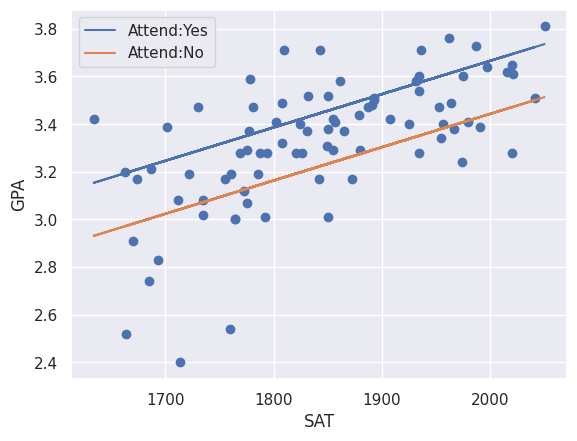

In [ ]:
#create a scatter plot of 'SAT' score and 'GPA'
plt.scatter(data_csv_mlr_mapped['SAT'], y)
plt.xlabel('SAT')
plt.ylabel('GPA')

#plot the two regression lines for Attendance->Yes and No on top of the scatter plot
plt.plot(data_csv_mlr_mapped['SAT'], yhat_AttendYes, label='Attend:Yes')
plt.plot(data_csv_mlr_mapped['SAT'], yhat_AttendNo, label='Attend:No')
plt.legend()

### 5(e) Easy visualization with color coded data points
Here, we will color code the data points corresponding to the two cases of dummy variable i.e. the Attendance for easy visualization inorder to investigate why the model with 'Attendance->Yes' is higher than the model with 'Attendance: No'

**What did we observe from the plot?:** We see that the data of students who attended class have higher GPA distribution compated to students who didn't attend the class, and correspondingly the regression model with 'Attendance->Yes' shifted higher than for the case with 'Attendance->No'. We can think this as two regression models for two distribution of data sets.

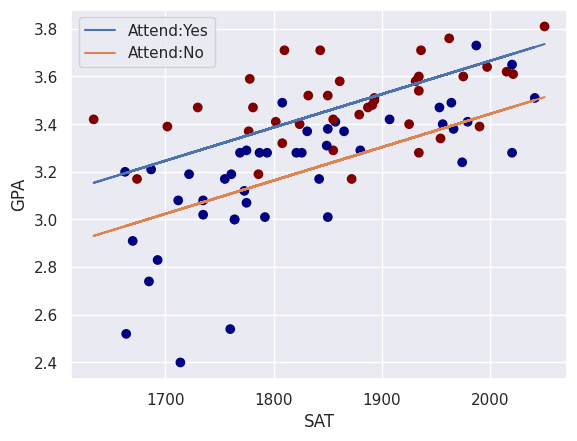

In [ ]:
#create a scatter plot of 'SAT' score and 'GPA'
plt.scatter(data_csv_mlr_mapped['SAT'], y, c=data_csv_mlr_mapped['Attendance'], cmap='jet')
plt.xlabel('SAT')
plt.ylabel('GPA')

#plot the two regression lines for Attendance->Yes and No on top of the scatter plot
plt.plot(data_csv_mlr_mapped['SAT'], yhat_AttendYes, label='Attend:Yes')
plt.plot(data_csv_mlr_mapped['SAT'], yhat_AttendNo, label='Attend:No')
plt.legend()

### 5(f) Add the original regression line in the above plot
Here, we are adding the orignal regression line from the case of univariate linear regression model, i.e., y=m*x+c, where x is the 'SAT' score and y is the GPA.
We had previously obtained, the following value for coefficients:
c = 0.2750, m = 0.0017. We now forumate a univariate regression model using these coeffients and overlay the regression line in the above scatter plot.

**Goal:** The goal of this exercise is to see the impact of inclusion of a new variable 'Attendance' in the model.

**What did we observe from the plot?:** We observed that the univariate regression model is more steeper than the case we include the 'Attendance' parameter and is in between the case of "Attendance =Yes and No".

In [ ]:
yhat_univariate = 0.2750 + 0.0017*data_csv_mlr_mapped['SAT']

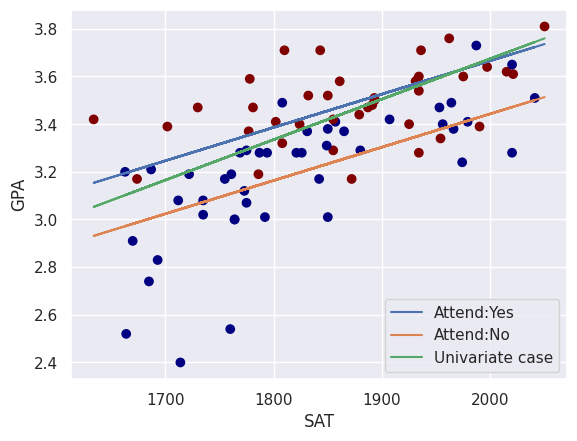

In [ ]:
#create a scatter plot of 'SAT' score and 'GPA'
plt.scatter(data_csv_mlr_mapped['SAT'], y, c=data_csv_mlr_mapped['Attendance'], cmap='jet')
plt.xlabel('SAT')
plt.ylabel('GPA')

#plot the two regression lines for Attendance->Yes and No on top of the scatter plot
plt.plot(data_csv_mlr_mapped['SAT'], yhat_AttendYes, label='Attend:Yes')
plt.plot(data_csv_mlr_mapped['SAT'], yhat_AttendNo, label='Attend:No')
plt.plot(data_csv_mlr_mapped['SAT'], yhat_univariate, label='Univariate case')
plt.legend()

## Step 6: Making predictions using the regression model

### 6(a) create a data-frame and use it for prediction
We will create a new data-frame and organize it in the same format as the data-frame used in the regression model. For the data used for prediciton, we will create two example data sets:
1. SAT score = 1700 and Attendance = 0
2. SAT score = 1670 and Attendance = 1

In [ ]:
df_forPredict = pd.DataFrame({'const':1, 'SAT':[1700, 1680], 'Attendance':[0,1]})
df_forPredict = df_forPredict[['const', 'SAT', 'Attendance']] #specifying order of colums, otherwise by default columns will be ordered alphabetically
df_forPredict

,const,SAT,Attendance
0,1,1700,0
1,1,1680,1


### 6(b) Make predictions for new data from the fitted regression


In [ ]:
new_predictions=result_OLS.predict(df_forPredict)
new_predictions

,0
0,3.023513
1,3.218161


### 6(c) Arrange predicted value along with the data used for prediction
Here, we will create a dataframe of the predicted value and then join it with the data frame with data used for prediction

In [ ]:
df_predicted=pd.DataFrame({'Prediction':new_predictions})
total_df= df_forPredict.join(df_predicted)
total_df

,const,SAT,Attendance,Prediction
0,1,1700,0,3.023513
1,1,1680,1,3.218161


### 6(d) Impact of dummy variable in prediction
Let's create a dataframe using the univariate regression model where the dummy variable i.e. 'Attendance' was not included. i.e., y=m*x+c, where x is the 'SAT' score and y is the GPA.
We had previously obtained, the following value for coefficients:
c = 0.2750, m = 0.0017.

**Observation:** We observe that if the dummy variable wasn't included in the model than for the student with SAT = 1680, it would predict a lower GPA, but since 'Attendance' was included, the student is now predicted to have higher GPA. Thus, we can see with Attendance=1, student is predicted higher 'GPA' and vide versa.

In [ ]:
total_df['UniVarPrediction'] = total_df['SAT']*0.0017 + 0.2750
total_df[['const', 'SAT', 'Attendance', 'Prediction', 'UniVarPrediction']]

,const,SAT,Attendance,Prediction,UniVarPrediction
0,1,1700,0,3.023513,3.165
1,1,1680,1,3.218161,3.131
